# Titanic Dataset Review
**Author:** Gabriel Richards (gjrich)

**Date:** 4 Apr 2025

**Objective:** This notebook is a review of the Titanic dataset to look at the passengers of the famous ship that struck an iceberg and sunk. At the end we conduct a test-train-split to prepare the dataset for Machine Learning in later modules.


## 1. Imports and Basic Review
In the code cell below, we import the necessary Python libraries for this notebook.  

In [46]:
# all imports at the top, organized
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Display a few records to verify
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Display basic information about the dataset using the info() method.

In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Display the first 10 rows.  If not the last statement in a Python cell, you'll have to wrap in the print() function to display. 



In [49]:
print(titanic.head(10))


   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

Check for missing values using the isnull() method and then the sum() method. 

In [50]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Display summary statistics using the describe() method

In [51]:
print(titanic.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Check for correlations using the corr() method and tell it to use only the numeric features. 



In [52]:
print(titanic.corr(numeric_only=True))


            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


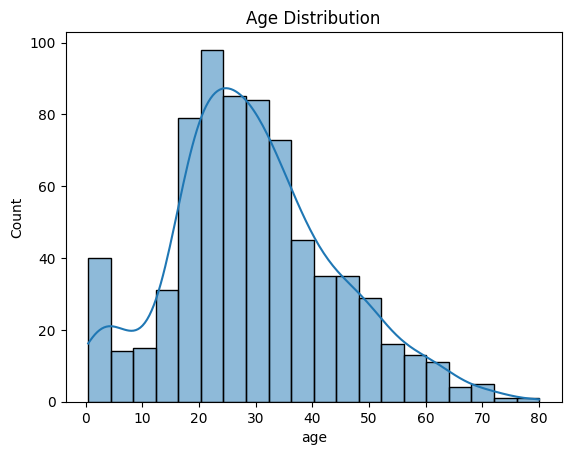

In [53]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions
Impute missing values for age using the median & Fill in missing values for embark_town using the mode

In [54]:
# Calculate the mean and standard deviation of known ages
age_mean = titanic['age'].mean()
age_std = titanic['age'].std()

# Count missing values
age_null_count = titanic['age'].isnull().sum()

# Generate random ages from normal distribution 
np.random.seed(307)  # For reproducibility
age_random_values = np.random.normal(age_mean, age_std, age_null_count)

# Apply age boundary constraints (0 to 85 years)
age_random_values = np.clip(age_random_values, 0, 85)

# Round ages to whole numbers
age_random_values = np.round(age_random_values)

# Create a mask for rows with missing age
age_null_mask = titanic['age'].isnull()

# Fill missing values with the random ages
titanic.loc[age_null_mask, 'age'] = age_random_values

# Round all ages in the dataset for consistency
titanic['age'] = titanic['age'].round()

# Verify no missing age values remain
print(f"Missing age values after imputation: {titanic['age'].isnull().sum()}")

Missing age values after imputation: 0


### Histogram of age

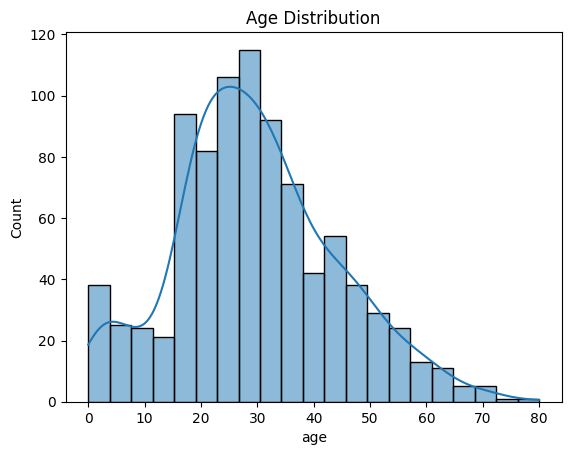

In [55]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

### 2.2 Feature Engineering

#### Create new features

We want to add a calculated feature we'll call `family_size`:
- **family_size**: number of family members on board
  - Count `sibsp` (number of siblings or spouses on board)
  - Count `parch` (number of parents or children on board)
  - Add 1 to count the individual

Most ML models need numerical input, even for categories. We do this by mapping categorical variables to numbers. There is no set way to do this - we'll show one example mapping for each of these below.

#### Convert categorical features to numeric

1. Convert categorical "sex" (male/female) to numeric binary (0 or 1)
   - male = 0
   - female = 1

2. Convert categorical "embarked" to numeric
   - "C" (Cherbourg) = 0
   - "Q" (Queenstown) = 1
   - "S" (Southampton) = 2

3. Binary feature - convert "alone" to numeric binary (0 or 1)
   - alone = 1
   - not alone = 0

In [56]:
# Create new feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Map categories to numeric values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Use survived as the target. 
We will do three input cases like the example. 

First:
- input features: alone
- target: survived

Second:
- input features - age (or another variable of your choice)
- target: survived

Third:
- input features -  age and family_size (or another combination of your choice)
- target: survived

### 3.2 Define X and y

- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time
- The follow starts with only the statements needed for case 1. 
- Double brackets [[ ]]  makes a 2D DataFrame
- Single brackets [ ]  make a 1D Series

In [57]:
# Case 1: Feature = alone

# Select the feature 'alone' as input
X1 = titanic[['alone']]

# Select 'survived' as the target for the same rows
y1 = titanic['survived']

# Case 2: Feature = age (drop if na or not available)

# Select the feature 'age', but drop rows where age is missing
X2 = titanic[['age']].dropna()

# Select the matching 'survived' values using the same index
y2 = titanic.loc[X2.index, 'survived']

# Case 3: Features = Age + Family Size (drop if na or not available)

# Select both 'age' and 'family_size', and drop rows where missing (na)
X3 = titanic[['age', 'family_size']].dropna()

# Select the corresponding 'survived' values for those rows
y3 = titanic.loc[X3.index, 'survived']

### 3.3 Reflection

#### Why are these features selected?
To compare how people survived between those alone, or with families of varying sizes. Additionally to review how age impacted survival.

#### Are there any features that are likely to be highly predictive of survival?
Many! Passenger class and sex, as examples.

## Section 4. Train a Classification Model (Decision Tree)

Here, we split the data into Split the data into training and test sets StratifiedShuffleSplit. 

For the Stratified Split, it distributes the rows into a similar 80/20 split, but ensuring that each set has a similar distribution for survival as the original distribution.

### 4.1 Split the Data
Split the data into training and test sets.

First, choose a data splitter. StratifiedShuffleSplit ensures that both training and test sets have a similar proportion of each class (survived = 0 or 1).

We wo;; split the data for each Case.

We use iloc to select rows by integer positions returned by the splitter
.iloc[] lets us pull rows based on the row's location/position, rather than a label (it tends to be safe and fast)

In [58]:
# Case 1: Feature = alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print('Case 1 - Alone:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))

Case 1 - Alone:
Train size: 712 | Test size: 179


In [59]:
# Case 2: Feature = age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print('Case 2 - Age:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))

Case 2 - Age:
Train size: 712 | Test size: 179


In [60]:
# Case 3: Features = age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print('Case 3 - Age + Family Size:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))

Case 3 - Age + Family Size:
Train size: 712 | Test size: 179


### 4.2 Create and Train Model (Decision Tree)
Create and train a decision tree model with no random initializer argument.

In [61]:
# CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [62]:
# CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [63]:
# CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data across all 3 cases.

In [64]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [65]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.66      0.94      0.78       439
           1       0.70      0.23      0.34       273

    accuracy                           0.67       712
   macro avg       0.68      0.58      0.56       712
weighted avg       0.67      0.67      0.61       712

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.61      0.86      0.71       110
           1       0.35      0.12      0.17        69

    accuracy                           0.58       179
   macro avg       0.48      0.49      0.44       179
weighted avg       0.51      0.58      0.51       179



In [66]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       439
           1       0.83      0.49      0.61       273

    accuracy                           0.77       712
   macro avg       0.79      0.71      0.72       712
weighted avg       0.78      0.77      0.75       712

Results for Decision Tree on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       110
           1       0.51      0.33      0.40        69

    accuracy                           0.62       179
   macro avg       0.58      0.57      0.56       179
weighted avg       0.60      0.62      0.60       179



### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix:

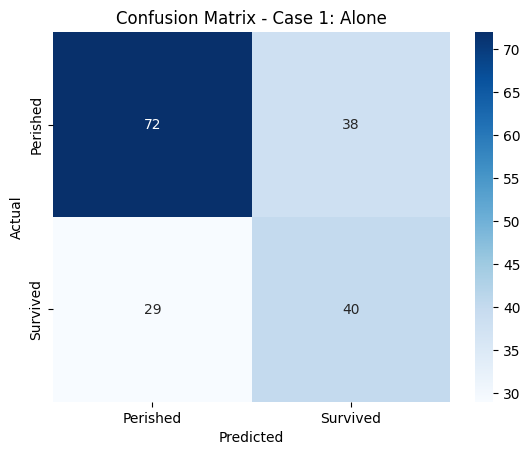

In [67]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Create more descriptive labels
class_labels = ['Perished', 'Survived']

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix - Case 1: Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

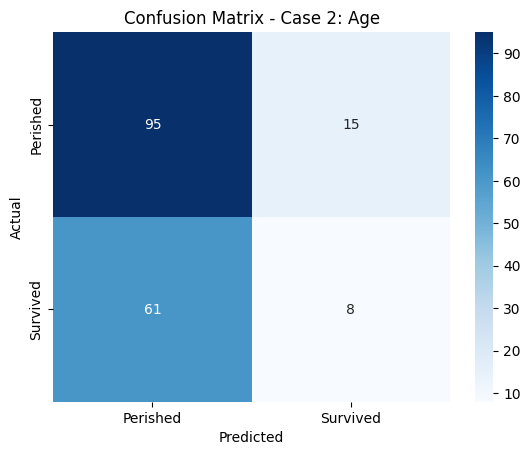

In [68]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix - Case 2: Age')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

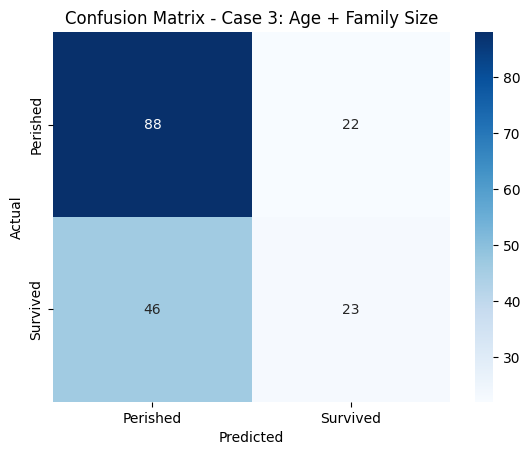

In [69]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix - Case 3: Age + Family Size')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot
Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

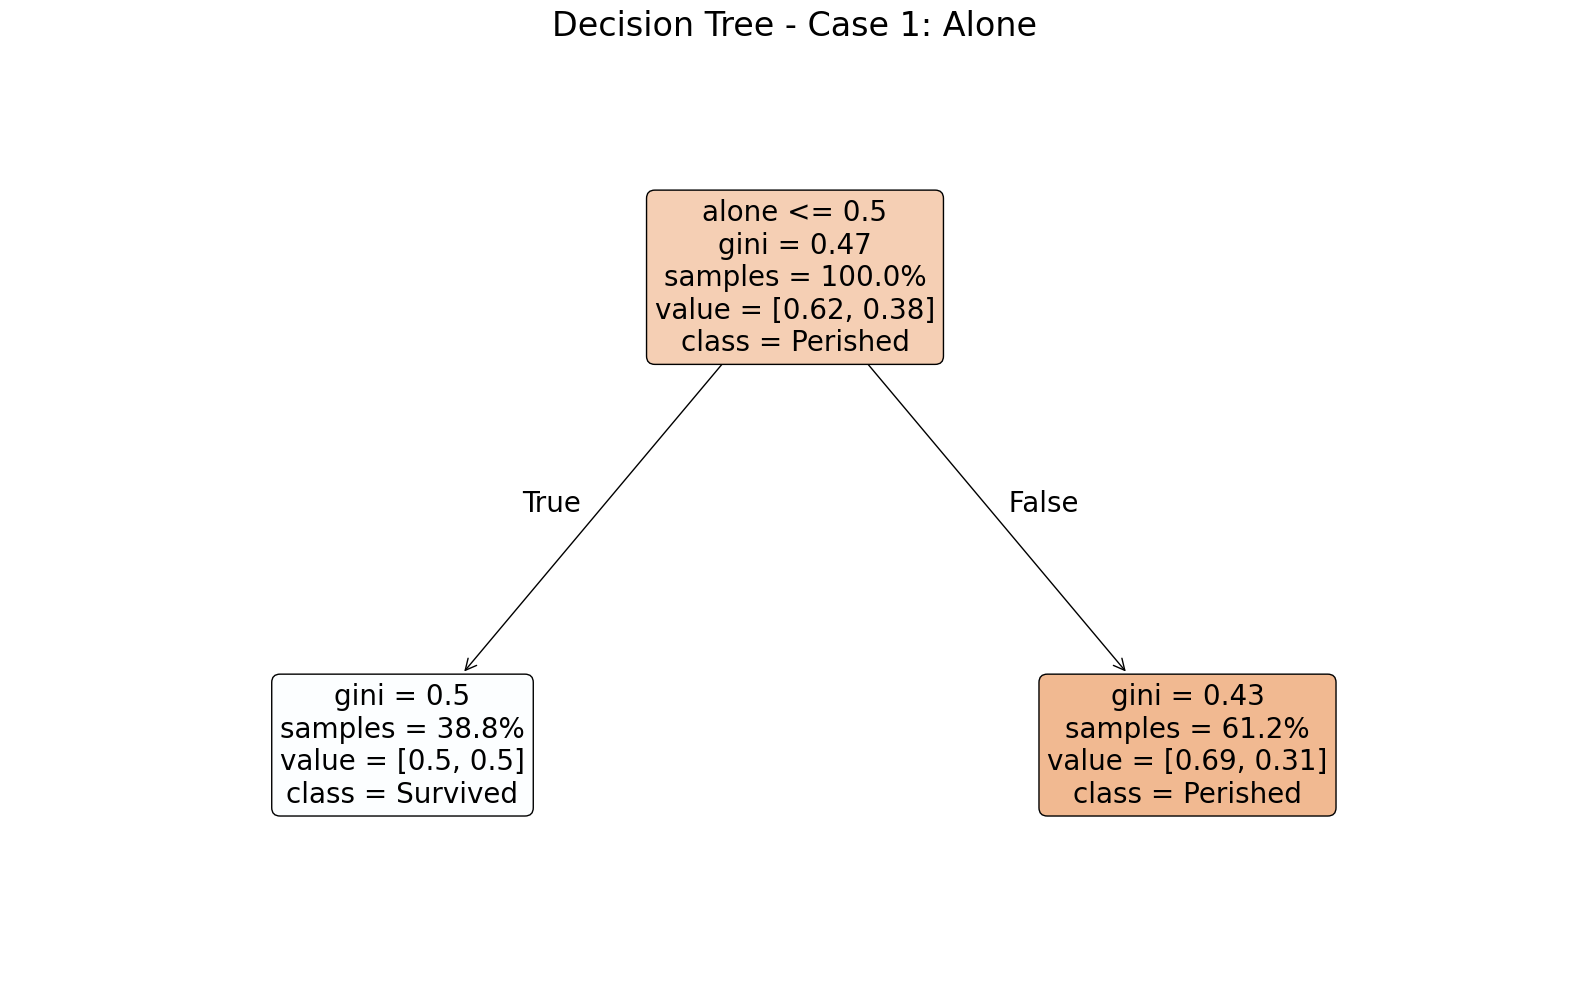

In [70]:
# Plot Decision Tree for Case 1 with improved visualization
fig = plt.figure(figsize=(16, 10))  # Larger figure size

plot_tree(
    tree_model1,
    feature_names=X1.columns,
    class_names=['Perished', 'Survived'],
    filled=True,
    fontsize=20,  # Control text size
    proportion=True,  # Show proportions instead of counts
    rounded=True,  # Rounded node corners
    precision=2  # Fewer decimal places
)

plt.title("Decision Tree - Case 1: Alone", fontsize=24)
plt.tight_layout()  # Adjust spacing
plt.show()

# Save image in higher resolution
fig.savefig("tree_case1_alone.png", dpi=300, bbox_inches='tight')

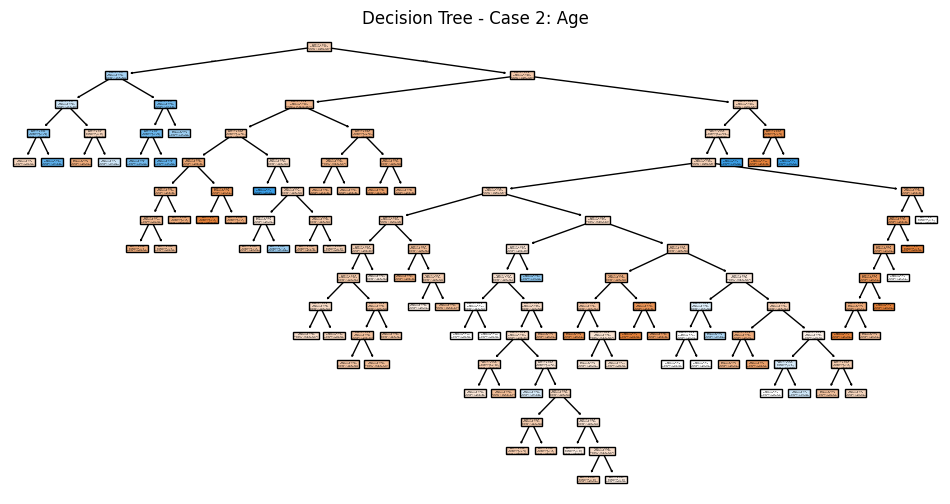

In [71]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Perished', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

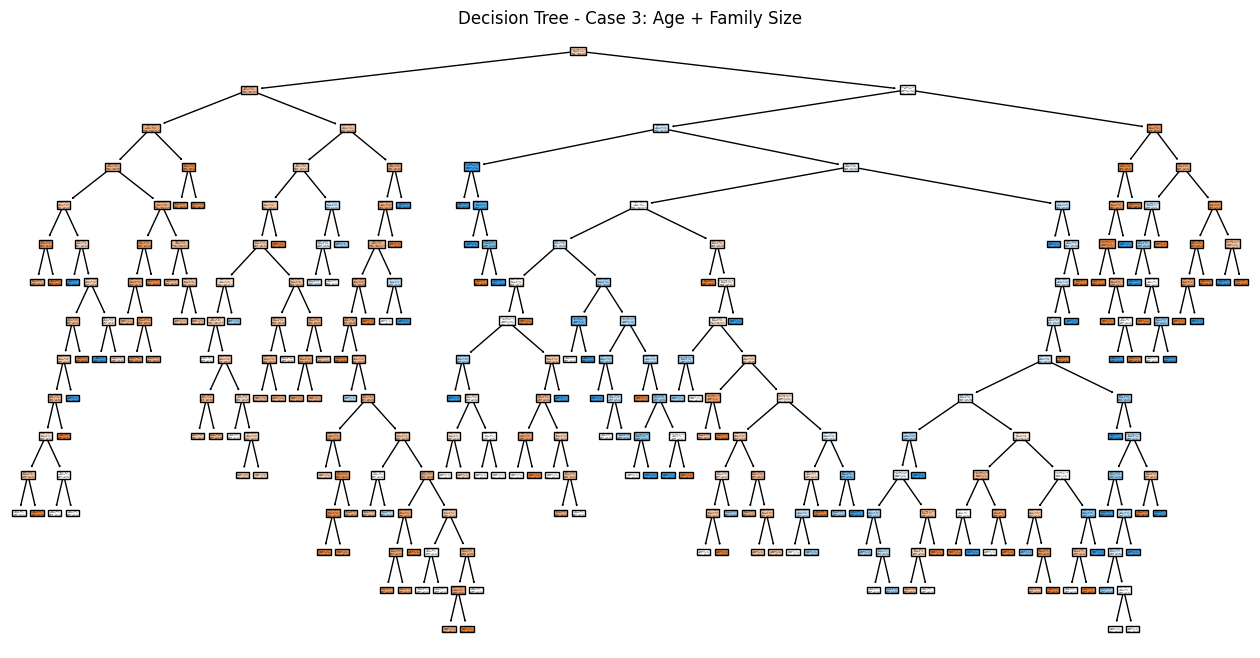

In [72]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Perished', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")

### 4. Reflection

How well did the different cases perform?
The across all metrics, for the test performed, alone did best, then age+family_size, then age.

Are there any surprising results?
It's surprising how much better age+family_size is than age alone.

Which inputs worked better? 
Across the board, alone was by far superior input feature. age+family_size did great on the training set, but may have overfitted

Age alone was the poorest indicator. Though it beat out alone on the training set, alone did better in teesting.

## Section 5. Compare Alternative Models (SVC, NN)
In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

Common SVC Kernels: 

- RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)
- Linear – Best for linearly separable data (straight line separation)
- Polynomial – Useful when the data follows a curved pattern
- Sigmoid – Similar to a neural network activation function; less common

Commenting the options in and out in the code can be helpful. The analyst decides which to use based on their understanding of the results. 

SVC Kernel: How to Choose
- Start with linear if you suspect the data is linearly separable.
- Use RBF if the data is complex or you aren’t sure.
- Try polynomial if the data seems to follow a curved boundary.
- Use sigmoid for experiments (rarely the best choice).


SVC Kernel: Common Issues and Techniques
- If the model takes too long to train, reduce the degree for polynomial kernels.
- If support_vectors_ gives an error, the data may not be separable with the current kernel. Try switching to RBF or adjusting the C (regularization) value.
- If the model misclassifies many points, then increase/decrease gamma or C.

## 5.1 Train and Evaluate Model (SVC)

### Default - RBF

In [73]:
# CASE 1: SVC using 'alone' with RBF Kernel (default)
svc_rbf_model1 = SVC()  # default is RBF
svc_rbf_model1.fit(X1_train, y1_train)
y1_rbf_pred = svc_rbf_model1.predict(X1_test)
print("Results for SVC (RBF Kernel) on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_rbf_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (RBF Kernel) on test data (Case 1 - alone):
              precision    recall  f1-score   support

Perished [0]       0.71      0.65      0.68       110
Survived [1]       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [74]:
# CASE 2: SVC using 'age' with RBF Kernel (default)
svc_rbf_model2 = SVC()  # default is RBF
svc_rbf_model2.fit(X2_train, y2_train)
y2_rbf_pred = svc_rbf_model2.predict(X2_test)
print("Results for SVC (RBF Kernel) on test data (Case 2 - age):")
print(classification_report(y2_test, y2_rbf_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (RBF Kernel) on test data (Case 2 - age):
              precision    recall  f1-score   support

Perished [0]       0.63      0.97      0.76       110
Survived [1]       0.62      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.63      0.52      0.45       179
weighted avg       0.63      0.63      0.52       179



In [75]:
# CASE 3: SVC using 'age + family_size' with RBF Kernel (default)
svc_rbf_model3 = SVC()  # default is RBF
svc_rbf_model3.fit(X3_train, y3_train)
y3_rbf_pred = svc_rbf_model3.predict(X3_test)
print("Results for SVC (RBF Kernel) on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_rbf_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (RBF Kernel) on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

Perished [0]       0.63      0.98      0.77       110
Survived [1]       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### Linear Kernel

In [77]:
# CASE 1: SVC using 'alone' with Linear Kernel
svc_linear_model1 = SVC(kernel='linear')
svc_linear_model1.fit(X1_train, y1_train)
y1_linear_pred = svc_linear_model1.predict(X1_test)
print("Results for SVC (Linear Kernel) on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_linear_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (Linear Kernel) on test data (Case 1 - alone):
              precision    recall  f1-score   support

Perished [0]       0.71      0.65      0.68       110
Survived [1]       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [78]:
# CASE 2: SVC using 'age' with Linear Kernel
svc_linear_model2 = SVC(kernel='linear')
svc_linear_model2.fit(X2_train, y2_train)
y2_linear_pred = svc_linear_model2.predict(X2_test)
print("Results for SVC (Linear Kernel) on test data (Case 2 - age):")
print(classification_report(y2_test, y2_linear_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (Linear Kernel) on test data (Case 2 - age):
              precision    recall  f1-score   support

Perished [0]       0.61      1.00      0.76       110
Survived [1]       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
# CASE 3: SVC using 'age + family_size' with Linear Kernel
svc_linear_model3 = SVC(kernel='linear')
svc_linear_model3.fit(X3_train, y3_train)
y3_linear_pred = svc_linear_model3.predict(X3_test)
print("Results for SVC (Linear Kernel) on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_linear_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (Linear Kernel) on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

Perished [0]       0.61      1.00      0.76       110
Survived [1]       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Polynomial Kernel


In [80]:
# CASE 1: SVC using 'alone' with Polynomial Kernel
svc_poly_model1 = SVC(kernel='poly', degree=3)
svc_poly_model1.fit(X1_train, y1_train)
y1_poly_pred = svc_poly_model1.predict(X1_test)
print("Results for SVC (Polynomial Kernel) on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_poly_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (Polynomial Kernel) on test data (Case 1 - alone):
              precision    recall  f1-score   support

Perished [0]       0.71      0.65      0.68       110
Survived [1]       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [81]:
# CASE 2: SVC using 'age' with Polynomial Kernel
svc_poly_model2 = SVC(kernel='poly', degree=3)
svc_poly_model2.fit(X2_train, y2_train)
y2_poly_pred = svc_poly_model2.predict(X2_test)
print("Results for SVC (Polynomial Kernel) on test data (Case 2 - age):")
print(classification_report(y2_test, y2_poly_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (Polynomial Kernel) on test data (Case 2 - age):
              precision    recall  f1-score   support

Perished [0]       0.61      1.00      0.76       110
Survived [1]       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
# CASE 3: SVC using 'age + family_size' with Polynomial Kernel
svc_poly_model3 = SVC(kernel='poly', degree=3)
svc_poly_model3.fit(X3_train, y3_train)
y3_poly_pred = svc_poly_model3.predict(X3_test)
print("Results for SVC (Polynomial Kernel) on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_poly_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (Polynomial Kernel) on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

Perished [0]       0.61      1.00      0.76       110
Survived [1]       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-gjrich\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Sigmoid Kernel

In [83]:
# CASE 1: SVC using 'alone' with Sigmoid Kernel
svc_sigmoid_model1 = SVC(kernel='sigmoid')
svc_sigmoid_model1.fit(X1_train, y1_train)
y1_sigmoid_pred = svc_sigmoid_model1.predict(X1_test)
print("Results for SVC (Sigmoid Kernel) on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_sigmoid_pred, target_names=["Perished [0]", "Survived [1]"]))


Results for SVC (Sigmoid Kernel) on test data (Case 1 - alone):
              precision    recall  f1-score   support

Perished [0]       0.71      0.65      0.68       110
Survived [1]       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [84]:
# CASE 2: SVC using 'age' with Sigmoid Kernel
svc_sigmoid_model2 = SVC(kernel='sigmoid')
svc_sigmoid_model2.fit(X2_train, y2_train)
y2_sigmoid_pred = svc_sigmoid_model2.predict(X2_test)
print("Results for SVC (Sigmoid Kernel) on test data (Case 2 - age):")
print(classification_report(y2_test, y2_sigmoid_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (Sigmoid Kernel) on test data (Case 2 - age):
              precision    recall  f1-score   support

Perished [0]       0.63      0.70      0.66       110
Survived [1]       0.41      0.33      0.37        69

    accuracy                           0.56       179
   macro avg       0.52      0.52      0.51       179
weighted avg       0.54      0.56      0.55       179



In [85]:
# CASE 3: SVC using 'age + family_size' with Sigmoid Kernel
svc_sigmoid_model3 = SVC(kernel='sigmoid')
svc_sigmoid_model3.fit(X3_train, y3_train)
y3_sigmoid_pred = svc_sigmoid_model3.predict(X3_test)
print("Results for SVC (Sigmoid Kernel) on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_sigmoid_pred, target_names=["Perished [0]", "Survived [1]"]))

Results for SVC (Sigmoid Kernel) on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

Perished [0]       0.61      0.65      0.63       110
Survived [1]       0.38      0.35      0.36        69

    accuracy                           0.53       179
   macro avg       0.50      0.50      0.50       179
weighted avg       0.52      0.53      0.53       179



### SVC Summary Stats

In [91]:
def create_kernel_summary_table(kernel_name, y1_true, y1_pred, y2_true, y2_pred, y3_true, y3_pred):
    """Create a summary table for a specific kernel across all three cases"""
    # Get metrics for each case
    report1 = classification_report(y1_true, y1_pred, target_names=["Perished [0]", "Survived [1]"], 
                                   output_dict=True, zero_division=0)  # Add zero_division=0 parameter
    report2 = classification_report(y2_true, y2_pred, target_names=["Perished [0]", "Survived [1]"], 
                                   output_dict=True, zero_division=0)
    report3 = classification_report(y3_true, y3_pred, target_names=["Perished [0]", "Survived [1]"], 
                                   output_dict=True, zero_division=0)
    
    # Extract metrics
    case1_accuracy = report1['accuracy']
    case1_weighted_f1 = report1['weighted avg']['f1-score']
    case1_perished_recall = report1['Perished [0]']['recall']
    case1_survived_recall = report1['Survived [1]']['recall']
    
    case2_accuracy = report2['accuracy']
    case2_weighted_f1 = report2['weighted avg']['f1-score']
    case2_perished_recall = report2['Perished [0]']['recall']
    case2_survived_recall = report2['Survived [1]']['recall']
    
    case3_accuracy = report3['accuracy']
    case3_weighted_f1 = report3['weighted avg']['f1-score']
    case3_perished_recall = report3['Perished [0]']['recall']
    case3_survived_recall = report3['Survived [1]']['recall']
    
    # Create and display summary table
    print(f"\n{kernel_name} Kernel Summary")
    print("=" * 80)
    print(f"| {'Case':<14} | {'Accuracy':<9} | {'Weighted F1':<11} | {'Perished Recall':<15} | {'Survived Recall':<15} |")
    print("|" + "-"*16 + "|" + "-"*11 + "|" + "-"*13 + "|" + "-"*17 + "|" + "-"*17 + "|")
    print(f"| Case 1 (alone) | {case1_accuracy:.4f}    | {case1_weighted_f1:.4f}      | {case1_perished_recall:.4f}          | {case1_survived_recall:.4f}          |")
    print(f"| Case 2 (age)   | {case2_accuracy:.4f}    | {case2_weighted_f1:.4f}      | {case2_perished_recall:.4f}          | {case2_survived_recall:.4f}          |")
    print(f"| Case 3 (a+f)   | {case3_accuracy:.4f}    | {case3_weighted_f1:.4f}      | {case3_perished_recall:.4f}          | {case3_survived_recall:.4f}          |")
    print("=" * 80)
    
    # Add notes about model behavior
    if case2_survived_recall == 0 and case3_survived_recall == 0:
        print(f"Note: The {kernel_name} kernel predicts all passengers perished in Cases 2 and 3.")
        print("      This is why you see warnings about 'Precision is ill-defined'.")
    elif case2_survived_recall == 0:
        print(f"Note: The {kernel_name} kernel predicts all passengers perished in Case 2.")
    elif case3_survived_recall == 0:
        print(f"Note: The {kernel_name} kernel predicts all passengers perished in Case 3.")
    print()
    


In [92]:
# RBF Kernel Summary
create_kernel_summary_table("RBF", y1_test, y1_rbf_pred, y2_test, y2_rbf_pred, y3_test, y3_rbf_pred)


RBF Kernel Summary
| Case           | Accuracy  | Weighted F1 | Perished Recall | Survived Recall |
|----------------|-----------|-------------|-----------------|-----------------|
| Case 1 (alone) | 0.6257    | 0.6292      | 0.6545          | 0.5797          |
| Case 2 (age)   | 0.6257    | 0.5181      | 0.9727          | 0.0725          |
| Case 3 (a+f)   | 0.6313    | 0.5214      | 0.9818          | 0.0725          |



In [93]:
# Linear Kernel Summary
create_kernel_summary_table("Linear", y1_test, y1_linear_pred, y2_test, y2_linear_pred, y3_test, y3_linear_pred)


Linear Kernel Summary
| Case           | Accuracy  | Weighted F1 | Perished Recall | Survived Recall |
|----------------|-----------|-------------|-----------------|-----------------|
| Case 1 (alone) | 0.6257    | 0.6292      | 0.6545          | 0.5797          |
| Case 2 (age)   | 0.6145    | 0.4678      | 1.0000          | 0.0000          |
| Case 3 (a+f)   | 0.6145    | 0.4678      | 1.0000          | 0.0000          |
Note: The Linear kernel predicts all passengers perished in Cases 2 and 3.
      This is why you see warnings about 'Precision is ill-defined'.



In [94]:
# Polynomial Kernel Summary
create_kernel_summary_table("Polynomial", y1_test, y1_poly_pred, y2_test, y2_poly_pred, y3_test, y3_poly_pred)


Polynomial Kernel Summary
| Case           | Accuracy  | Weighted F1 | Perished Recall | Survived Recall |
|----------------|-----------|-------------|-----------------|-----------------|
| Case 1 (alone) | 0.6257    | 0.6292      | 0.6545          | 0.5797          |
| Case 2 (age)   | 0.6145    | 0.4678      | 1.0000          | 0.0000          |
| Case 3 (a+f)   | 0.6145    | 0.4678      | 1.0000          | 0.0000          |
Note: The Polynomial kernel predicts all passengers perished in Cases 2 and 3.
      This is why you see warnings about 'Precision is ill-defined'.



In [95]:
# Sigmoid Kernel Summary
create_kernel_summary_table("Sigmoid", y1_test, y1_sigmoid_pred, y2_test, y2_sigmoid_pred, y3_test, y3_sigmoid_pred)


Sigmoid Kernel Summary
| Case           | Accuracy  | Weighted F1 | Perished Recall | Survived Recall |
|----------------|-----------|-------------|-----------------|-----------------|
| Case 1 (alone) | 0.6257    | 0.6292      | 0.6545          | 0.5797          |
| Case 2 (age)   | 0.5587    | 0.5480      | 0.7000          | 0.3333          |
| Case 3 (a+f)   | 0.5307    | 0.5263      | 0.6455          | 0.3478          |



## 5.2 Visualize Support Vectors (1D Case 1 and 2D Case 3)
We can create scatter plots to visualize support vectors. This helps understand how the SVM model separates the data. We'll use Case 1 first - but since it only has one dimension, it's kind of boring. Try to do so for Case 2 as well, but it is also only one input, and one case. Then, we'll do Case 3. Since Case 3 has two inputs, the plot has two dimensions, and our division will hopefully show a two dimensional division (like a line or margin). 
To visualize support vectors, we follow a 3 step process. 


#### Step 1) Split the data into two groups:

- Survived – Passengers who survived the Titanic sinking (value = 1).
- Perished – Passengers who did not survive (value = 0).


#### Step 2) Plot each category using different shapes and colors:

- Yellow squares ('s') for survived passengers
- Cyan triangles ('^') for non-survived passengers


#### Step 3) Overlay the support vectors — the critical data points used to define the decision boundary — with black plus signs.

- Black pluses ('+') will represent the support vectors.
- Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

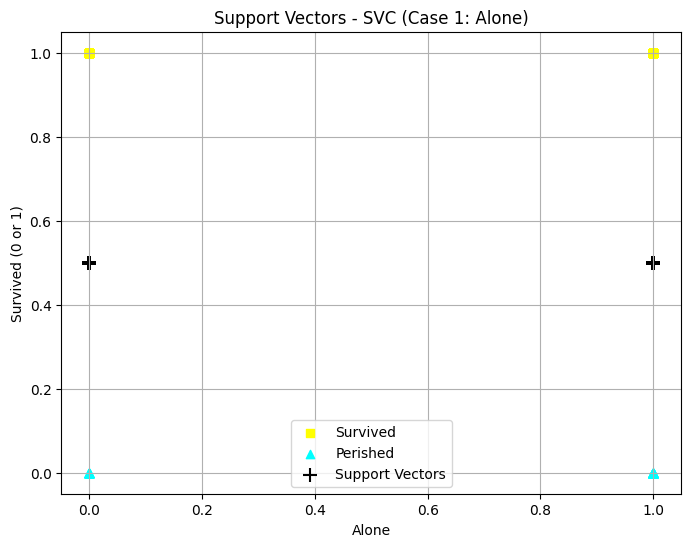

In [99]:
# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, 'alone']
perished_alone = X1_test.loc[y1_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(perished_alone, y1_test.loc[y1_test == 0], c='cyan', marker='^', label='Perished')

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_rbf_model1, 'support_vectors_'):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_rbf_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()

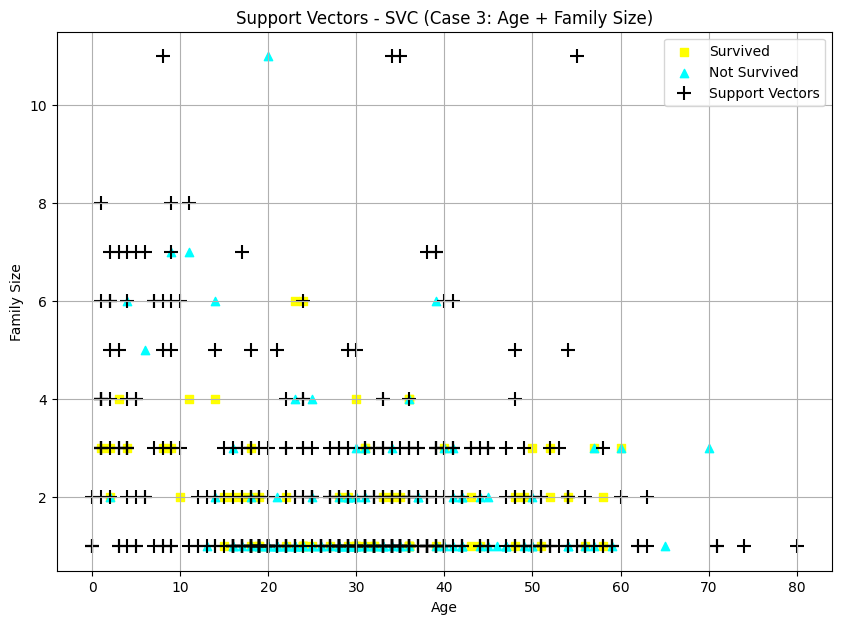

In [100]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
perished = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived['age'], survived['family_size'],
            c='yellow', marker='s', label='Survived')

# Plot not survived (cyan triangles)
plt.scatter(perished['age'], perished['family_size'],
            c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
if hasattr(svc_rbf_model3, 'support_vectors_'):
    support_vectors = svc_rbf_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c='black', marker='+', s=100, label='Support Vectors')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()